In [1]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
#data sugmentation
# Preprocessing the Training set
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.22)
training_set = datagen.flow_from_directory('train',
                                                    target_size=(224,224),
                                                    color_mode="rgb",
                                                    subset="training",
                                                    class_mode="binary",
                                                    batch_size=32,
                                                    shuffle=True)

Found 95 images belonging to 6 classes.


In [5]:
valid_generator=datagen.flow_from_directory( directory="train",
                                                target_size=(224,224),
                                                color_mode="rgb",
                                                subset="validation",
                                                class_mode="binary",
                                                batch_size=32,
                                                shuffle=True)

Found 24 images belonging to 6 classes.


In [6]:
## showing some image from training
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

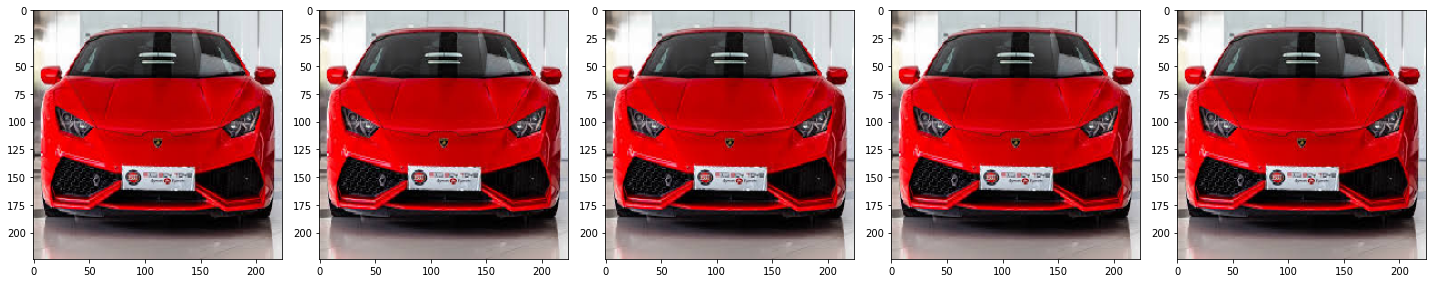

In [7]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

In [8]:
training_set.class_indices

{'BMW': 0,
 'Ferrari': 1,
 'Ford': 2,
 'Mercedes-Benz': 3,
 'audi': 4,
 'lamborghini': 5}

In [9]:
import tensorflow_hub as hub 

In [10]:
BATCH_SIZE = 5
IMG_SHAPE = 224 # match image dimension to mobile net input keep smae

In [11]:
# getting MobileNet
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net = hub.KerasLayer(URL, input_shape=(IMG_SHAPE, IMG_SHAPE, 3))

In [12]:
mobile_net.trainable = False

In [13]:
model = tf.keras.models.Sequential([
    mobile_net,
    ### ann layer
    tf.keras.layers.Dense(6, activation='softmax') #[0, 1] or [1, 0]
    ])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 6)                 7686      
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(
    training_set,
    epochs=40,
    validation_data=valid_generator
    )

Epoch 1/40
3/3 [==============================] - 11s 3s/step - loss: 2.2719 - accuracy: 0.1497 - val_loss: 1.9200 - val_accuracy: 0.0833
Epoch 2/40
3/3 [==============================] - 8s 3s/step - loss: 1.9210 - accuracy: 0.1885 - val_loss: 1.8389 - val_accuracy: 0.2917
Epoch 3/40
3/3 [==============================] - 7s 2s/step - loss: 1.6844 - accuracy: 0.2687 - val_loss: 1.7163 - val_accuracy: 0.2500
Epoch 4/40
3/3 [==============================] - 7s 2s/step - loss: 1.4616 - accuracy: 0.4447 - val_loss: 1.6118 - val_accuracy: 0.3333
Epoch 5/40
3/3 [==============================] - 6s 2s/step - loss: 1.2957 - accuracy: 0.5317 - val_loss: 1.5391 - val_accuracy: 0.3750
Epoch 6/40
3/3 [==============================] - 6s 2s/step - loss: 1.0807 - accuracy: 0.7082 - val_loss: 1.4791 - val_accuracy: 0.4583
Epoch 7/40
3/3 [==============================] - 7s 3s/step - loss: 1.0044 - accuracy: 0.7409 - val_loss: 1.4304 - val_accuracy: 0.5417
Epoch 8/40
3/3 [========================

In [19]:
# Part 4 - Making a single prediction
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('2.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result =np.argmax(model.predict(test_image),axis=1)
result[0]

1

In [20]:
from tensorflow.keras.models import load_model
model.save('model_mobilenet.h5')